### Start with importing class

In [2]:
from desummation import Desummation
import numpy as np
dsm = Desummation(frobenius=False)

C:\Users\Саша Кукунцев\AppData\Roaming\Python\Python311\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


### Create new matrix
$$
    A = \begin{pmatrix}
    3 & 7 & 2 & 0 \\
    -4 & 2 & 0 & -3 \\
    5 & 0 & 2 & -1 \\
    5 & -5 & -2 & -4 \\
    \end{pmatrix} 
$$

In [3]:
A = [[3, 7, 2, 0], [-4, 2, 0, -3], [5, 0, 2, -1], [5, -5, -2, -4]] 

### Now fit some random matrices to this matrix

In [4]:
dsm.fit(A, 8)

### Get all the information you might need

In [5]:
dsm.weights()

[0.9959145757334049,
 1.7353229119542704,
 -1.769175760841783,
 -0.951925874629227,
 -0.6389510768087661,
 -0.6481928622120527,
 0.335578504420174,
 0.08559811370613435]

### Now let's see which matrix we got

In [6]:
dsm.predict(A)

array([[ 2.22676272,  4.59115912,  1.33574653,  3.09838367],
       [-1.15288095, -3.09817721,  2.89299121,  1.53051538],
       [-0.17945724,  0.16412803,  0.75920111, -2.9419244 ],
       [ 1.25150493, -2.13508865, -0.95119253, -0.45168037]])

In [7]:
np.array(A)

array([[ 3,  7,  2,  0],
       [-4,  2,  0, -3],
       [ 5,  0,  2, -1],
       [ 5, -5, -2, -4]])

In [8]:
dsm.error()

20.93763348874473

### This is not very good approximation.
#### Certain ways to improve this:
- ##### make more trials for weights searching (using weights_old.py)
- ##### `make more random matrices`
- ##### change metric between matrices
- ##### change distribution of elements in matrices

In [9]:
dsm.fit(A, 16, n_trials=2000, distribution='exponential', scale=1)

In [10]:
dsm.predict(A)

array([[ 2.49008778,  6.56725884,  1.30891383,  1.00222828],
       [-4.48271286,  1.23232763,  0.43420658, -2.36250735],
       [ 4.46386166,  0.5863807 ,  2.62649365, -0.27789372],
       [ 4.44015546, -4.56082377, -1.64088647, -4.78427559]])

In [11]:
np.array(A)

array([[ 3,  7,  2,  0],
       [-4,  2,  0, -3],
       [ 5,  0,  2, -1],
       [ 5, -5, -2, -4]])

In [12]:
dsm.error()

2.4783407015143646

In [13]:
dsm.weights()

[3.064224537688366,
 4.4988492662401125,
 -0.14695064132478652,
 -0.463633915141596,
 2.085320259850917,
 -0.8863371560313302,
 -6.993807917023584,
 -2.0345938105140515,
 -0.22139692171349612,
 -1.0854576899648194,
 1.5735516459468215,
 -0.3150599397742937,
 -3.314346089807451,
 4.333272339612023,
 -1.9390516013540662,
 0.44415057925499557]

# What are the inferences?

### You can experiment with it yourself, but judging by my intuition and my experiments:
- #### Almost always we will find weights with (frobenius norm) loss close to 0 `if` we use $n^2$ weights (tested only for square matrix for now). I think that it may be some sort of `solution to a linear system`. You may understand me beforehand if you remember the basis for matrices(the one consisting of $E_{ij}$ matrices)
- #### I think a lot about applying this to ML and DL and came up to some insight: [you can see this page](https://weightagnostic.github.io/) or trust my words. The experiment showcased on this page focused on utilizing random weights in ANNs `without` any explicit `weight training`, but `rather allowing the weights between neuron connections to be learned`. This approach offers a more cost-effective training method while still achieving impressive capabilities. This just reminds me of my problem.

## Now let's get some information about loss function for some fixed basis
### Is it convex? For someone who already knows the answer, you can go just down below for an explanation.

### First, start with simple one:
$$
A = \begin{pmatrix}
2 & -1 \\
-5 & 4 \\
\end{pmatrix}
$$


In [14]:
import plotly.graph_objects as go
dsm_convexity2 = Desummation()
A1 = [[2, -1], [-5, 4]]
dsm_convexity2.fit(A1, 2)

### Now define a function for plotting
- #### We will need a meshgrid of x and y.
    - ##### I will be using only 2 random matrices for good visualization (x and y coordinates).
    - ##### Weights are programmed to be found from $2 \cdot min$ to $2 \cdot max$ value of matrix A, but maybe this is wrong. I don't know it yet.
- #### Also a function that will return an error, for that I will calculate the frobenius norm loss.

In [15]:
n = 200
w1 = np.linspace(-20, 20, n)
w2 = np.linspace(-20, 20, n)

In [16]:
def frobenius_loss(x, y, dsm_object, target, distance='fro'):
    B = np.tensordot(np.stack([x, y]), dsm_object.matrices(), axes=1)
    return np.linalg.norm(target - B, ord=distance)

In [17]:
def plot(w1, w2, Z):
    fig = go.Figure(data=[go.Surface(x=w1, y=w2, z=Z)], layout=go.Layout(width=600, height=400))

    # Set layout options
    fig.update_layout(
        title='3D Plot of Loss Function',
        scene=dict(
            xaxis_title='w1',
            yaxis_title='w2',
            zaxis_title='Loss',
            aspectratio=dict(x=1, y=1, z=1),
            camera=dict(
                eye=dict(x=1, y=1, z=1)
            )
        ),
        autosize=True
    )
    argmin = np.argmin(Z)
    row_index = argmin // n
    col_index = argmin % n

    print(f'Minimum value obtained at {np.min(Z)} with weights: w1:{w1[col_index]} and w2:{w2[row_index]}')
    fig.show()


In [18]:
Z = np.array([[frobenius_loss(x=x, y=y, dsm_object=dsm_convexity2, target=A1) for x in w1] for y in w2])
#plot(w1, w2, Z)

![plot1](plot1.png)

### I think it's a strike!!!
#### It's `clearly convex` function! And only with 2 weights. Case was very simple, but you can modify values in A, call dsm_convexety.fit() again to update random matrices, see if anything changes.

### Now let's try more difficult one:
#### This time convexity is quite questionable
$$
A = \begin{pmatrix}
2 & -5 & 4 \\
-3 & -3 & 2 \\
1 & 2 & 6 \\
\end{pmatrix}
$$


In [19]:
dsm_convexity3 = Desummation()
A2 = [[2, -5, 4], [-3, -3, 2], [1, 2, 6]]
dsm_convexity3.fit(A2, 2, distribution = 'normal')

In [20]:
n = 100
w1 = np.linspace(-12, 12, n)
w2 = np.linspace(-12, 12, n)

In [21]:
Z = np.array([[frobenius_loss(x=x, y=y, dsm_object=dsm_convexity3, target=A2) for x in w1] for y in w2])
#plot(w1, w2, Z)

![plot2](plot2.png)

### This is convex too! You can try various shapes of A, various distributions, but there wouldn't be a case of not convex plot.
#### This is all because of [convexity of frobenius norm](https://ics.uci.edu/~xhx/courses/ConvexOpt/convex_functions.pdf)!
So we can just go with how many weights we want and will always find a best approximation for our matrix.
## Now it's time to reveal the truth...

## There is actually a *numerical solution*. And, as we already know, `distinct` which is due to convexity.

#### It took 20 seconds for matrix with shape (4, 4) and with 16 random matrices to find a solution, which can still appear to be not the best one.
#### Now let me solve it in <0.1 second with brilliant accuracy:

In [22]:
A = [[3, 7, 2, 0], [-4, 2, 0, -3], [5, 0, 2, -1], [5, -5, -2, -4]] 
dsm_new = Desummation(frobenius=True)
print(np.array(A), dsm_new.fit_predict(A, 16), dsm_new.weights(), dsm_new.error(), sep='\n')

[[ 3  7  2  0]
 [-4  2  0 -3]
 [ 5  0  2 -1]
 [ 5 -5 -2 -4]]
[[ 3.00000000e+00  7.00000000e+00  2.00000000e+00  1.28785871e-14]
 [-4.00000000e+00  2.00000000e+00 -1.15463195e-14 -3.00000000e+00]
 [ 5.00000000e+00  2.88657986e-15  2.00000000e+00 -1.00000000e+00]
 [ 5.00000000e+00 -5.00000000e+00 -2.00000000e+00 -4.00000000e+00]]
[ 0.97247319 -6.24826884  0.53365514 -3.47484654  0.38267372  0.27795969
 -6.12543311  4.76471103  4.70331179 -0.09877375 -2.0538444  -3.26253404
 -1.92325275  2.72239096 -0.32218645  1.67457795]
3.754918050587562e-14


### For now it works with frobenius norm between matrices and maybe there is closer in some metric.
### But when amount is equals to a number of elements in matrix it finds the best approximation possible

# Why this works:


### I'll explain it in the case of 3x3 matrix, but all stays the same for any shape

### (*Definition*)
$$
A = \begin{pmatrix}
p_1 & p_2 & p_3 \\
p_4 & p_5 & p_6 \\
p_7 & p_8 & p_9 \\
\end{pmatrix}_{3 \times 3} = w_1 \cdot \begin{pmatrix}
a^1_{11} & a^1_{12} & a^1_{13} \\
a^1_{21} & a^1_{22} & a^1_{23} \\
a^1_{31} & a^1_{32} & a^1_{33} \\
\end{pmatrix}_{3 \times 3}+ \ldots + w_k \cdot \begin{pmatrix}
a^k_{11} & a^k_{12} & a^k_{13} \\
a^k_{21} & a^k_{22} & a^k_{23} \\
a^k_{31} & a^k_{32} & a^k_{33} \\
\end{pmatrix}_{3 \times 3}
$$
### This is equivalent to this *system of linear equations*:
$$
w_1 \cdot a^1_{11} + w_2 \cdot a^2_{11} + \ldots + w_k \cdot a^k_{11} = p_1 \
$$
$$
\vdots
$$
$$
w_1 \cdot a^1_{33} + w_2 \cdot a^2_{33} + \ldots + w_k \cdot a^k_{33} = p_9
$$
- ##### *9* equations (n $\cdot$ m in general case)
- ##### *k* weights
- ##### System is *overdefined*
    - ##### There is already a solution: [you can check this Wikipedia page with explicit answer for overdefined systems](https://en.wikipedia.org/wiki/Overdetermined_system#Approximate_solutions)
    - ##### This solution is `least squares method`
    - ##### And for k = n $\cdot$ m there is the best possible solution

# Now this code becomes really fast and I will certainly try to implement it later in the future. `Stay tuned for updates!`

In [23]:
import mnist

train_images = mnist.train_images()
train_labels = mnist.train_labels()

In [34]:
zeroes = list(np.where(np.array(train_labels) == 0)[0][:800])
ones = list(np.where(np.array(train_labels) == 1)[0][:800])
twos = list(np.where(np.array(train_labels) == 2)[0][1:800])
threes = list(np.where(np.array(train_labels) == 3)[0][1:800])
fours = list(np.where(np.array(train_labels) == 4)[0][1:800])
fives = list(np.where(np.array(train_labels) == 5)[0][1:800])
sixs = list(np.where(np.array(train_labels) == 6)[0][1:800])
sevens = list(np.where(np.array(train_labels) == 7)[0][1:800])
eights = list(np.where(np.array(train_labels) == 8)[0][1:800])
nines = list(np.where(np.array(train_labels) == 9)[0][1:800])


In [27]:
dsm_pictures = Desummation()

In [28]:
import random as rd

In [29]:
index = rd.randint(40000, 50000)
label = train_labels[index]
example = np.resize(train_images[index], (28, 28))

[-0.01880452 -0.2215909   0.06647508  0.10929012 -0.05060546 -0.05560098
  0.32165179  0.0403623  -0.16179138 -0.02652222  0.09073106 -0.0848242
  0.0508344  -0.05162291  0.30457355  0.03279023  0.03553536  0.1487288
  0.10051966 -0.04084005  0.00184897 -0.04654179  0.08949025 -0.29858415
 -0.01929603 -0.12235003 -0.01857105  0.16578686  0.01506455 -0.03286886
  0.00314574 -0.05281984 -0.03037149  0.01779776  0.12675322  0.00964304
  0.29375892  0.08640911  0.08950766  0.26367472  0.12014886  0.05357645
 -0.05022515 -0.15763315  0.02355312 -0.06600257  0.02868888 -0.06024196
 -0.05197705 -0.01954878 -0.05023972 -0.0655277  -0.0568371   0.02274273
 -0.06703567 -0.01674478  0.09889447  0.17808384  0.07776731  0.09451693
 -0.03704589 -0.16223943 -0.05858117 -0.07893769  0.07206404 -0.1705875
 -0.03234059 -0.24725974  0.06159277  0.09699763  0.06589414 -0.0908826
  0.04447005 -0.0490828   0.11966788  0.03989903  0.04780069  0.18868159
  0.18486928 -0.01381648 -0.00677635 -0.12491791  0.082

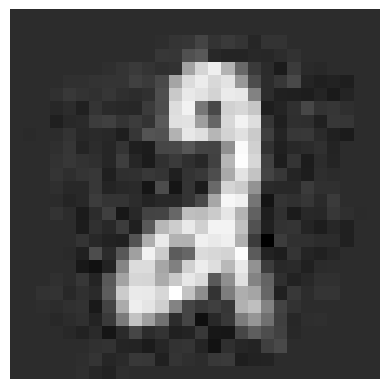

In [30]:
dim = 200
dsm_pictures.fit(example, dim)
for j in range(dim):
    dsm_pictures.basis.matrices[j] = np.resize(train_images[j], (28, 28))
picture_one = dsm_pictures.predict(example)
print(dsm_pictures.weights(), dsm_pictures.error())
print("Answer", label)
print('Index', index)
plt.imshow(picture_one, cmap='gray')
plt.axis('off')
plt.show()